# Assignment 2: PBL Characteristics and landcover

In [1]:
#load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import pandas as pd
from pathlib import Path
import scipy.stats
from datetime import datetime
import datetime
import sklearn.metrics

In [2]:
from utility import cal_vap_sat, cal_dens_dry, cal_dens_vap, cal_cpa, cal_dens_air, cal_Lob, cal_des_dta, cal_vpd, cal_gamma

In [3]:
%load_ext autoreload
%autoreload 2

### Load data (US-MOz)

In [44]:
group_number = 2
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-MOz'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataM = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

#### LAI

In [45]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

#US-MOz
df_LAIM=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIM.columns=['product']+[i.split(' ')[1] for i in df_LAIM.columns if i!='product']
df_LAIM=df_LAIM.filter(['modis_date','value_mean'])

df_LAIM.set_index(df_LAIM.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIM.drop('modis_date',axis=1,inplace=True)
df_LAIM = df_LAIM.loc['2005 01 01':'2007 12 31']

LAIM_month = df_LAIM.groupby(df_LAIM.index.month).median()
LAIM_mupper = df_LAIM.groupby(df_LAIM.index.month).quantile(0.75)
LAIM_mlower = df_LAIM.groupby(df_LAIM.index.month).quantile(0.25)

LAIM_mu = [0.456650, 0.530700, 0.674300, 1.508800, 3.623675, 4.057175, 3.693100, 3.324850, 3.191925, 1.973100, 0.784975, 0.554525]
LAIM_ml = [0.300050, 0.409900, 0.576400, 1.051100, 2.403100, 3.421200, 2.787200, 2.780750, 2.383150, 1.221900, 0.640275, 0.303275]

### Load data (US-Bo1)

In [47]:
group_number = 6
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

# specify the site name
name_of_site = 'US-Bo1'

# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_dataB = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
#df_data.head()

#### LAI

In [58]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

df_LAIB=pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAIB.columns=['product']+[i.split(' ')[1] for i in df_LAIB.columns if i!='product']
df_LAIB=df_LAIB.filter(['modis_date','value_mean'])

df_LAIB.set_index(df_LAIB.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAIB.drop('modis_date',axis=1,inplace=True)
df_LAIB = df_LAIB.loc['2005 01 01':'2007 12 31']

LAIB_month = df_LAIB.groupby(df_LAIB.index.month).median()
LAIB_mupper = df_LAIB.groupby(df_LAIB.index.month).quantile(0.75)
LAIB_mlower = df_LAIB.groupby(df_LAIB.index.month).quantile(0.25)

LAIB_mu = [0.101200, 0.106600, 0.199950, 0.338400, 0.419950, 1.667475, 4.195500, 3.906750, 0.978450, 0.276500, 0.146775, 0.102425]
LAIB_ml = [0.000000, 0.000000, 0.121250, 0.258500, 0.339625, 0.936050, 2.874700, 2.080875, 0.387275, 0.171300, 0.107175, 0.100000]

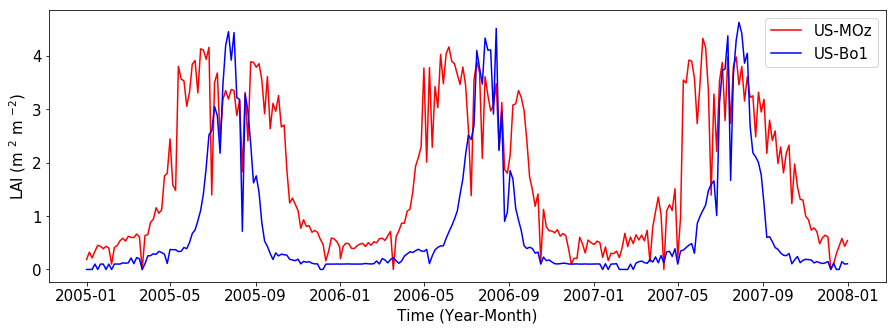

In [49]:
fontsize=15
plt.figure(figsize=(15,5))
plt.plot(df_LAIM, color='red', label='US-MOz')
plt.plot(df_LAIB, color='blue', label='US-Bo1')
plt.legend(loc='best', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('LAI (m $^{2}$ m $^{-2}$)', fontsize=fontsize)
plt.xlabel('Time (Year-Month)', fontsize=fontsize)
plt.savefig('LAI_series.png', dpi=200)

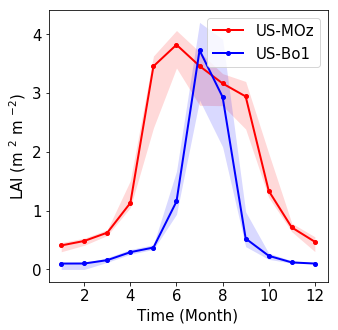

In [59]:
plt.figure(figsize=(5,5))
plt.plot(LAIM_month, color='red', marker='o', markersize=4, linewidth=2, label='US-MOz')
plt.fill_between(LAIM_mupper.index, LAIM_mu, LAIM_ml, lw=0.0, alpha=0.15, color='red')
plt.plot(LAIB_month, color='blue', marker='o', markersize=4, linewidth=2, label='US-Bo1')
plt.fill_between(LAIB_mupper.index, LAIB_mu, LAIB_ml, lw=0.0, alpha=0.15, color='blue')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('LAI (m $^{2}$ m $^{-2}$)', fontsize=fontsize)
plt.xlabel('Time (Month)', fontsize=fontsize)
plt.xticks([2,4,6,8,10,12])
plt.savefig('LAIu.png', dpi=200)

In [17]:
#Full year
df_dataM1 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB1 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM1e = df_dataM1[df_dataM1['SWIN']>5]
df_dataB1e = df_dataB1[df_dataB1['SWIN']>5]

Mdata1 = df_dataM1.loc[:,['TA', 'P']].dropna()
Bdata1 = df_dataB1.loc[:,['TA', 'P']].dropna()

In [104]:
df_dataM2005 = df_dataM.loc['2005 04 01':'2005 10 31']
df_dataM2006 = df_dataM.loc['2006 04 01':'2006 10 31']
df_dataM2007 = df_dataM.loc['2007 04 01':'2007 10 31']
df_dataP = pd.concat([df_dataM2005, df_dataM2006, df_dataM2007], axis=0)

MdataP = df_dataP.loc[:,['TA','P']].dropna()
Mdata05 = df_dataM2005.loc[:,['TA','P']].dropna()
Mdata06 = df_dataM2006.loc[:,['TA','P']].dropna()
Mdata07 = df_dataM2007.loc[:,['TA','P']].dropna()

Precipall = np.sum(MdataP.P)/3
Precip05 = np.sum(Mdata05.P)
Precip06 = np.sum(Mdata06.P)
Precip07 = np.sum(Mdata07.P)

print (Precipall)
print (Precip05)
print (Precip06)
print (Precip07)

539.6333333333333
699.4000000000001
495.9
423.6


In [105]:
df_dataB2005 = df_dataB.loc['2005 04 01':'2005 10 31']
df_dataB2006 = df_dataB.loc['2006 04 01':'2006 10 31']
df_dataB2007 = df_dataB.loc['2007 04 01':'2007 10 31']
df_dataPb = pd.concat([df_dataB2005, df_dataB2006, df_dataB2007], axis=0)

BdataP = df_dataPb.loc[:,['TA','P']].dropna()
Bdata05 = df_dataB2005.loc[:,['TA','P']].dropna()
Bdata06 = df_dataB2006.loc[:,['TA','P']].dropna()
Bdata07 = df_dataB2007.loc[:,['TA','P']].dropna()

Precipallb = np.sum(BdataP.P)/3
Precip05b = np.sum(Bdata05.P)
Precip06b = np.sum(Bdata06.P)
Precip07b = np.sum(Bdata07.P)

print (Precipallb)
print (Precip05b)
print (Precip06b)
print (Precip07b)

480.2
534.4
608.0
298.2


In [21]:
Temp_M = Mdata1.TA
Temp_B = Bdata1.TA

print (np.nanmedian(Temp_M))
print (np.nanmedian(Temp_B))

Temp_M_month = Temp_M.groupby(Temp_M.index.month).median()
Temp_B_month = Temp_B.groupby(Temp_B.index.month).median()

Temp_M_mupper = Temp_M.groupby(Temp_M.index.month).quantile(0.75)
Temp_M_mlower = Temp_M.groupby(Temp_M.index.month).quantile(0.25)
Temp_B_mupper = Temp_B.groupby(Temp_B.index.month).quantile(0.75)
Temp_B_mlower = Temp_B.groupby(Temp_B.index.month).quantile(0.25)

Temp_M_em = Temp_M.groupby(pd.Grouper(freq='M')).median()
Temp_B_em = Temp_B.groupby(pd.Grouper(freq='M')).median()

15.35
13.4


In [31]:
print (np.shape(Temp_M_mupper.index))
print (np.shape(LAIM_mupper.index))

(12,)
(12,)


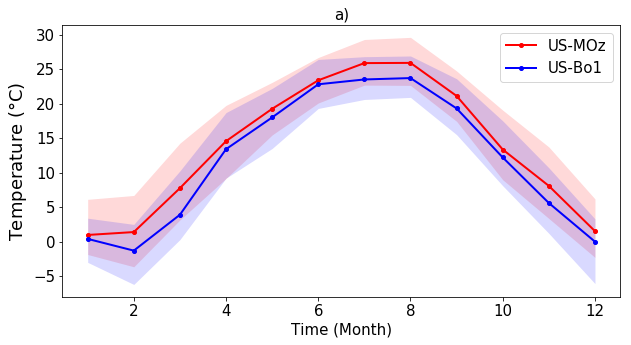

In [25]:
plt.figure(figsize=(10,5))
plt.plot(Temp_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
plt.fill_between(Temp_M_mupper.index, Temp_M_mupper, Temp_M_mlower, lw=0.0, alpha=0.15, color='red')
plt.plot(Temp_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
plt.fill_between(Temp_B_mupper.index, Temp_B_mupper, Temp_B_mlower, lw=0.0, alpha=0.15, color='blue')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (Month)', fontsize=15)
plt.ylabel('Temperature ($\degree$C)', fontsize=18)
plt.title('a)', fontsize=15)
plt.savefig('Tempu.png', dpi=200)

In [61]:
Prec_M = Mdata1.P
Prec_B = Bdata1.P

print (np.sum(Prec_M)/3)
print (np.sum(Prec_B)/3)

Prec_M_month = Prec_M.groupby(Prec_M.index.month).sum()/3
Prec_B_month = Prec_B.groupby(Prec_B.index.month).sum()/3

Prec_M_em = Prec_M.groupby(pd.Grouper(freq='M')).sum()
Prec_B_em = Prec_B.groupby(pd.Grouper(freq='M')).sum()

Prec_M_mupper = Prec_M.groupby(Temp_M.index.month).quantile(0.75)
Prec_M_mlower = Prec_M.groupby(Temp_M.index.month).quantile(0.25)
Prec_B_mupper = Temp_B.groupby(Temp_B.index.month).quantile(0.75)
Prec_B_mlower = Temp_B.groupby(Temp_B.index.month).quantile(0.25)

740.1833333333334
736.8666666666667


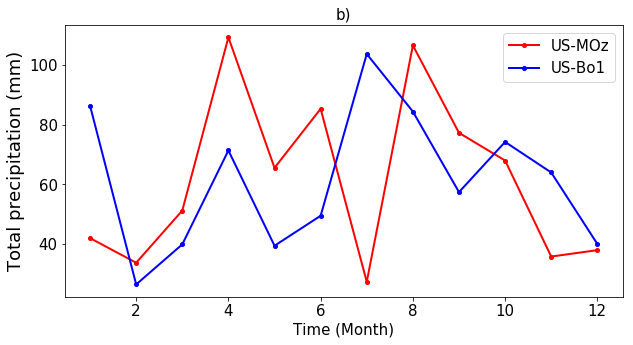

In [63]:
plt.figure(figsize=(10,5))
plt.plot(Prec_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
plt.plot(Prec_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (Month)', fontsize=15)
plt.ylabel('Total precipitation (mm)', fontsize=18)
plt.title('b)', fontsize=15)
plt.savefig('Precipu.png', dpi=200)

### Fluxes

In [70]:
#Full year
df_dataM2 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB2 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM2e = df_dataM2[df_dataM2['SWIN']>5]
df_dataB2e = df_dataB2[df_dataB2['SWIN']>5]

Mdata2 = df_dataM2e.loc[:,['NETRAD', 'H','LE']].dropna()
Bdata2 = df_dataB2e.loc[:,['NETRAD', 'H','LE']].dropna()

#Summer
M2005 = Mdata2.loc['2005 04 01':'2005 10 31']
M2006 = Mdata2.loc['2006 04 01':'2006 10 31']
M2007 = Mdata2.loc['2007 04 01':'2007 10 31']
Mdata2_sum = pd.concat([M2005, M2006, M2007], axis=0)

B2005 = Bdata2.loc['2005 04 01':'2005 10 31']
B2006 = Bdata2.loc['2006 04 01':'2006 10 31']
B2007 = Bdata2.loc['2007 04 01':'2007 10 31']
Bdata2_sum = pd.concat([B2005, B2006, B2007], axis=0)

In [71]:
#US-MOz
Qstar_M = Mdata2.NETRAD
Qh_M = Mdata2.H
Qe_M = Mdata2.LE
Qs_M = Qstar_M - Qh_M - Qe_M

Qstar_M_month = Qstar_M.groupby(Qstar_M.index.month).median()
Qh_M_month = Qh_M.groupby(Qh_M.index.month).median()
Qe_M_month = Qe_M.groupby(Qe_M.index.month).median()
Qs_M_month = Qs_M.groupby(Qs_M.index.month).median()

#US-Bo1
Qstar_B = Bdata2.NETRAD
Qh_B = Bdata2.H
Qe_B = Bdata2.LE
Qs_B = Qstar_B - Qh_B - Qe_B

Qstar_B_month = Qstar_B.groupby(Qstar_B.index.month).median()
Qh_B_month = Qh_B.groupby(Qh_B.index.month).median()
Qe_B_month = Qe_B.groupby(Qe_B.index.month).median()
Qs_B_month = Qs_B.groupby(Qs_B.index.month).median()

#Summer
Qstar_M_sum = Mdata2_sum.NETRAD
Qh_M_sum = Mdata2_sum.H
Qe_M_sum = Mdata2_sum.LE
Qs_M_sum = Qstar_M_sum - Qh_M_sum - Qe_M_sum

Qstar_B_sum = Bdata2_sum.NETRAD
Qh_B_sum = Bdata2_sum.H
Qe_B_sum = Bdata2_sum.LE
Qs_B_sum = Qstar_B_sum - Qh_B_sum - Qe_B_sum

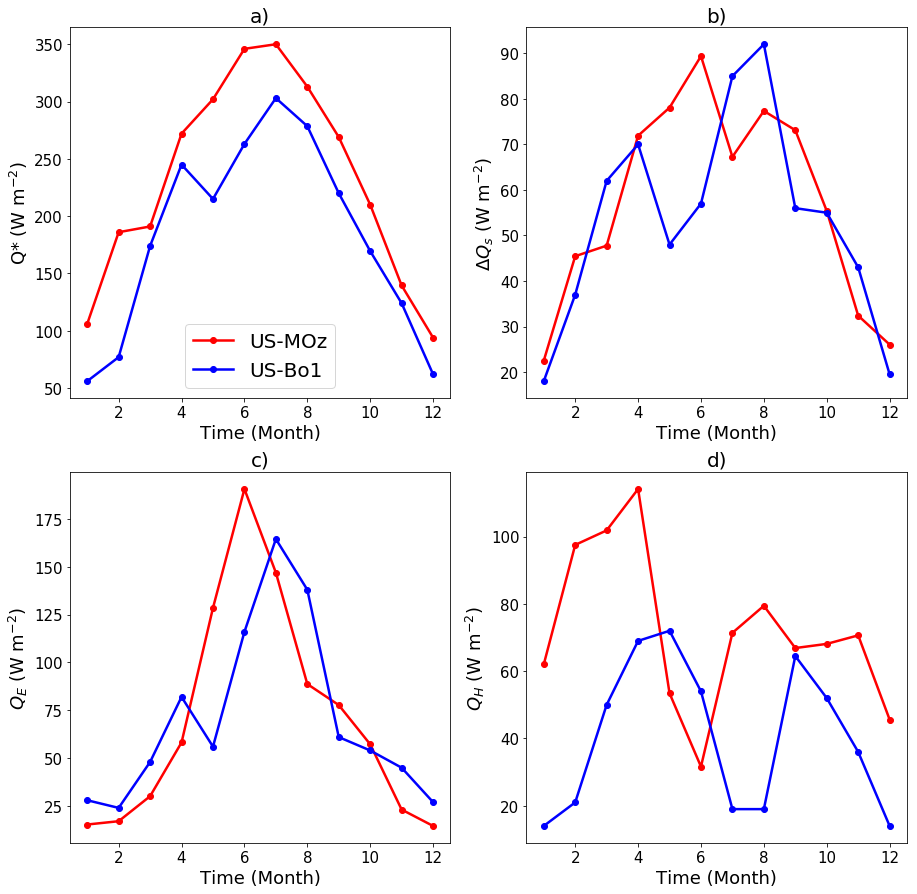

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0,0].plot(Qstar_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,0].plot(Qstar_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
ax[0,0].legend(loc='best', fontsize=20)
ax[0,0].tick_params(labelsize=15)
ax[0,0].set_xlabel('Time (Month)', fontsize=18)
ax[0,0].set_ylabel('Q* (W m$^{-2}$)', fontsize=18)
ax[0,0].set_title('a)', fontsize=20)

ax[0,1].plot(Qs_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[0,1].plot(Qs_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[0,1].legend(loc='best', fontsize=20)
ax[0,1].tick_params(labelsize=15)
ax[0,1].set_xlabel('Time (Month)', fontsize=18)
ax[0,1].set_ylabel('$\Delta Q_{s}$ (W m$^{-2}$)', fontsize=18)
ax[0,1].set_title('b)', fontsize=20)

ax[1,0].plot(Qe_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,0].plot(Qe_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,0].legend(loc='best', fontsize=20)
ax[1,0].tick_params(labelsize=15)
ax[1,0].set_xlabel('Time (Month)', fontsize=18)
ax[1,0].set_ylabel('$Q_{E}$ (W m$^{-2}$)', fontsize=18)
ax[1,0].set_title('c)', fontsize=20)

ax[1,1].plot(Qh_M_month,color='red', marker='o', markersize=6, label = 'US-MOz', linewidth=2.5)
ax[1,1].plot(Qh_B_month, color='blue', marker='o', markersize=6, label = 'US-Bo1', linewidth=2.5)
#ax[1,1].legend(loc='best', fontsize=20)
ax[1,1].tick_params(labelsize=15)
ax[1,1].set_xlabel('Time (Month)', fontsize=18)
ax[1,1].set_ylabel('$Q_{H}$ (W m$^{-2}$)', fontsize=18)
ax[1,1].set_title('d)', fontsize=20)

plt.savefig('SEB_comparisonu.png', dpi=200)

### Albedo

In [73]:
df_dataM3 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB3 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM3e = df_dataM3[df_dataM3['SWIN']>5]
df_dataB3e = df_dataB3[df_dataB3['SWIN']>5]

Mdata3 = df_dataM3e.loc[:,['SWIN', 'SWOUT']].dropna()
Bdata3 = df_dataB3e.loc[:,['SWIN', 'SWOUT']].dropna()

In [75]:
# Albedo
alb_M = Mdata3.SWOUT/Mdata3.SWIN
alb_B = Bdata3.SWOUT/Bdata3.SWIN

alb_M_month = alb_M.groupby(alb_M.index.month).median()
alb_M_mupper = alb_M.groupby(alb_M.index.month).quantile(0.75)
alb_M_mlower = alb_M.groupby(alb_M.index.month).quantile(0.25)
alb_B_month = alb_B.groupby(alb_B.index.month).median()
alb_B_mupper = alb_B.groupby(alb_B.index.month).quantile(0.75)
alb_B_mlower = alb_B.groupby(alb_B.index.month).quantile(0.25)

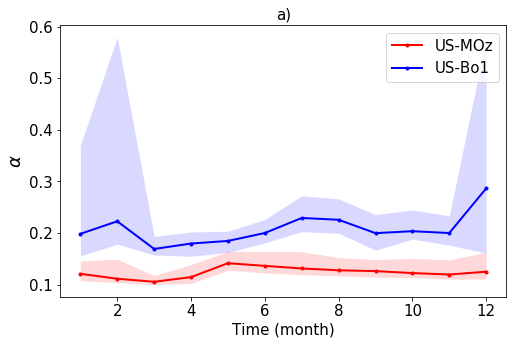

In [79]:
plt.figure(figsize=(8,5))
plt.plot(alb_M_month, color='red', marker='o', markersize=3, label='US-MOz', linewidth=2)
plt.fill_between(alb_M_mupper.index, alb_M_mupper, alb_M_mlower, lw=0.0, alpha=0.15, color='red')
plt.plot(alb_B_month, color='blue', marker='o', markersize=3, label='US-Bo1', linewidth=2)
plt.fill_between(alb_B_mupper.index, alb_B_mupper, alb_B_mlower, lw=0.0, alpha=0.15, color='blue')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=18)
plt.title('a)', fontsize=15)
plt.savefig('Albedo.png', dpi=200)

### z0

In [82]:
# z0
#Full year
df_dataM4 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB4 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM4e = df_dataM3[df_dataM3['SWIN']>5]
df_dataB4e = df_dataB3[df_dataB3['SWIN']>5]

Mdata4 = df_dataM4e.loc[:,['WS','USTAR']].dropna()
Bdata4 = df_dataB4e.loc[:,['WS','USTAR']].dropna()

Mdata4e = Mdata4[(Mdata4.WS!=0)]
Bdata4e = Bdata4[(Bdata4.WS!=0)]


In [83]:
#US-MOz
z_meas_M = 30
h_sfc_M = 22
d_M = 0.7*h_sfc_M

Uz_M = Mdata4e.WS
Ustar_M = Mdata4e.USTAR

#US-Bo1
z_meas_B = 10
h_sfc_B_win = 0
h_sfc_B_corn = 3
h_sfc_B_soya = 0.9
d_B = Bdata4e.USTAR.copy()

d_B.loc['2005 01 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B.loc['2007 10 01':'2007 12 31'] = (0.7 * h_sfc_B_win)

Uz_B = Bdata4e.WS
Ustar_B = Bdata4e.USTAR

In [ ]:
d_B_sum = 

In [86]:
z0_M = (z_meas_M - d_M)*np.exp(-(Uz_M*0.4)/Ustar_M)
z0_B = (z_meas_B - d_B)*np.exp(-(Uz_B*0.4)/Ustar_B)

z0_Mn = z0_M[z0_M!=0]
z0_Bn = z0_B[z0_B!=0]

z0_M_month = z0_Mn.groupby(z0_Mn.index.month).median()
z0_M_mupper = z0_Mn.groupby(z0_Mn.index.month).quantile(0.75)
z0_M_mlower = z0_Mn.groupby(z0_Mn.index.month).quantile(0.25)
z0_B_month = z0_Bn.groupby(z0_Bn.index.month).median()
z0_B_mupper = z0_Bn.groupby(z0_Bn.index.month).quantile(0.75)
z0_B_mlower = z0_Bn.groupby(z0_Bn.index.month).quantile(0.25)

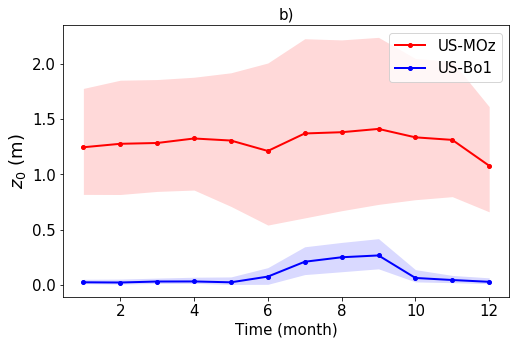

In [95]:
plt.figure(figsize=(8,5))
plt.plot(z0_M_month, color='red', marker='o', markersize=4, label='US-MOz', linewidth=2)
plt.fill_between(z0_M_mupper.index, z0_M_mupper, z0_M_mlower, lw=0.0, alpha=0.15, color='red')
plt.plot(z0_B_month, color='blue', marker='o', markersize=4, label='US-Bo1', linewidth=2)
plt.fill_between(z0_B_mupper.index, z0_B_mupper, z0_B_mlower, lw=0.0, alpha=0.15, color='blue')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$z_{0}$ (m)', fontsize=18)
plt.title('b)', fontsize=15)
plt.savefig('z0u.png', dpi=200)

### Bowen ratio

In [96]:
# Bowen ratio
df_dataM5 = df_dataM.loc['2005 01 01':'2007 12 31']
df_dataB5 = df_dataB.loc['2005 01 01':'2007 12 31']

df_dataM5e = df_dataM5[df_dataM5['SWIN']>5]
df_dataB5e = df_dataB5[df_dataB5['SWIN']>5]

Mdata5 = df_dataM5e.loc[:,['H', 'LE']].dropna()
Bdata5 = df_dataB5e.loc[:,['H', 'LE']].dropna()

Mdata5e = Mdata5[Mdata5.LE!=0]
Bdata5e = Bdata5[Bdata5.LE!=0]

In [97]:
Bowen_M = Mdata5e.H/Mdata5e.LE
Bowen_B = Bdata5e.H/Bdata5e.LE

Bowen_M_month = Bowen_M.groupby(Bowen_M.index.month).median()
Bowen_M_mupper = Bowen_M.groupby(Bowen_M.index.month).quantile(0.75)
Bowen_M_mlower = Bowen_M.groupby(Bowen_M.index.month).quantile(0.25)
Bowen_B_month = Bowen_B.groupby(Bowen_B.index.month).median()
Bowen_B_mupper = Bowen_B.groupby(Bowen_B.index.month).quantile(0.75)
Bowen_B_mlower = Bowen_B.groupby(Bowen_B.index.month).quantile(0.25)

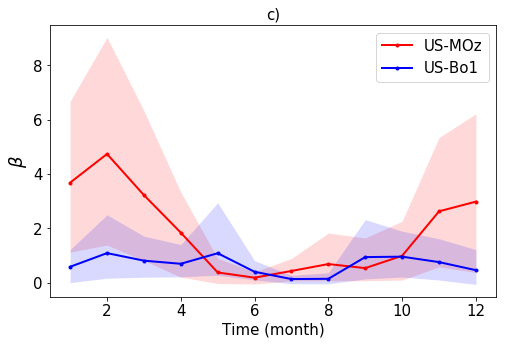

In [101]:
plt.figure(figsize=(8,5))
plt.plot(Bowen_M_month, color='red', marker='o', markersize=3, label='US-MOz', linewidth=2)
plt.fill_between(Bowen_M_mupper.index, Bowen_M_mupper, Bowen_M_mlower, lw=0.0, alpha=0.15, color='red')
plt.plot(Bowen_B_month, color='blue', marker='o', markersize=3, label='US-Bo1', linewidth=2)
plt.fill_between(Bowen_B_mupper.index, Bowen_B_mupper, Bowen_B_mlower, lw=0.0, alpha=0.15, color='blue')
plt.legend(loc='best', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.ylabel(r'$\beta$', fontsize=18)
plt.title('c)', fontsize=15)
plt.savefig('Bowenu.png', dpi=200)

### 2007: year of relative drought

In [182]:
df_dataM2005 = df_dataM.loc['2005 04 01':'2005 10 31']
df_dataM2006 = df_dataM.loc['2006 04 01':'2006 10 31']
df_dataM2007 = df_dataM.loc['2007 04 01':'2007 10 31']
df_dataP = pd.concat([df_dataM2005, df_dataM2006, df_dataM2007], axis=0)

MdataP = df_dataP.loc[:,['TA','P']].dropna()
Mdata05 = df_dataM2005.loc[:,['TA','P']].dropna()
Mdata06 = df_dataM2006.loc[:,['TA','P']].dropna()
Mdata07 = df_dataM2007.loc[:,['TA','P']].dropna()

Precipall = np.sum(MdataP.P)/3
Precip05 = np.sum(Mdata05.P)
Precip06 = np.sum(Mdata06.P)
Precip07 = np.sum(Mdata07.P)

print (Precipall)
print (Precip05)
print (Precip06)
print (Precip07)

Tempall = np.nanmedian(MdataP.TA)
Temp05 = np.nanmedian(Mdata05.TA)
Temp06 = np.nanmedian(Mdata06.TA)
Temp07 = np.nanmedian(Mdata07.TA)

print (Tempall)
print (Temp05)
print (Temp06)
print (Temp07)

539.6333333333333
699.4000000000001
495.9
423.6
21.43
21.11
21.0
22.08


In [183]:
df_dataB2005 = df_dataB.loc['2005 04 01':'2005 10 31']
df_dataB2006 = df_dataB.loc['2006 04 01':'2006 10 31']
df_dataB2007 = df_dataB.loc['2007 04 01':'2007 10 31']
df_dataPb = pd.concat([df_dataB2005, df_dataB2006, df_dataB2007], axis=0)

BdataP = df_dataPb.loc[:,['TA','P']].dropna()
Bdata05 = df_dataB2005.loc[:,['TA','P']].dropna()
Bdata06 = df_dataB2006.loc[:,['TA','P']].dropna()
Bdata07 = df_dataB2007.loc[:,['TA','P']].dropna()

Precipallb = np.sum(BdataP.P)/3
Precip05b = np.sum(Bdata05.P)
Precip06b = np.sum(Bdata06.P)
Precip07b = np.sum(Bdata07.P)

print (Precipallb)
print (Precip05b)
print (Precip06b)
print (Precip07b)

Tempallb = np.nanmedian(BdataP.TA)
Temp05b = np.nanmedian(Bdata05.TA)
Temp06b = np.nanmedian(Bdata06.TA)
Temp07b = np.nanmedian(Bdata07.TA)

print (Tempallb)
print (Temp05b)
print (Temp06b)
print (Temp07b)

480.2
534.4
608.0
298.2
20.3
20.2
18.7
21.5


In [120]:
df_dataPe = df_dataP[df_dataP['SWIN']>5]
df_dataM2007e = df_dataM2007[df_dataM2007['SWIN']>5]

Mdatarad = df_dataPe.loc[:,['NETRAD','H','LE']].dropna()
Mdatar07 = df_dataM2007e.loc[:,['NETRAD','H','LE']].dropna()

QstarMm = np.nanmedian(Mdatarad.NETRAD)
QstarM07 = np.nanmedian(Mdatar07.NETRAD)
QstarMratio = QstarM07/QstarMm

QeMm = np.nanmedian(Mdatarad.LE)
QeM07 = np.nanmedian(Mdatar07.LE)
QeMratio = QeM07/QeMm

QhMm = np.nanmedian(Mdatarad.H)
QhM07 = np.nanmedian(Mdatar07.H)
QhMratio = QhM07/QhMm

QsM = Mdatarad.NETRAD - Mdatarad.H - Mdatarad.LE
QsM07 = Mdatar07.NETRAD - Mdatar07.H - Mdatar07.LE

QsMm = np.nanmedian(QsM)
QsM07 = np.nanmedian(QsM07)
QsMratio = QsM07/QsMm

In [128]:
df_dataPbe = df_dataPb[df_dataPb['SWIN']>5]
df_dataB2007e = df_dataB2007[df_dataB2007['SWIN']>5]

Bdatarad = df_dataPbe.loc[:,['NETRAD','H','LE']].dropna()
Bdatar07 = df_dataB2007e.loc[:,['NETRAD','H','LE']].dropna()

QstarBm = np.nanmedian(Bdatarad.NETRAD)
QstarB07 = np.nanmedian(Bdatar07.NETRAD)
QstarBratio = QstarB07/QstarBm

QeBm = np.nanmedian(Bdatarad.LE)
QeB07 = np.nanmedian(Bdatar07.LE)
QeBratio = QeB07/QeBm

QhBm = np.nanmedian(Bdatarad.H)
QhB07 = np.nanmedian(Bdatar07.H)
QhBratio = QhB07/QhBm

QsB = Bdatarad.NETRAD - Bdatarad.H - Bdatarad.LE
QsB07 = Bdatar07.NETRAD - Bdatar07.H - Bdatar07.LE

QsBm = np.nanmedian(QsB)
QsB07 = np.nanmedian(QsB07)
QsBratio = QsB07/QsBm

In [136]:
#albedo
Malb = df_dataPe.loc[:,['SWIN','SWOUT']].dropna()
Malb07 = df_dataM2007e.loc[:,['SWIN','SWOUT']].dropna()

albMm = np.nanmedian(Malb.SWOUT/Malb.SWIN)
albM07 = np.nanmedian(Malb07.SWOUT/Malb.SWIN)
albMratio = albM07/albMm

Balb = df_dataPbe.loc[:,['SWIN','SWOUT']].dropna()
Balb07 = df_dataB2007e.loc[:,['SWIN','SWOUT']].dropna()

albBm = np.nanmedian(Balb.SWOUT/Balb.SWIN)
albB07 = np.nanmedian(Balb07.SWOUT/Balb.SWIN)
albBratio = albB07/albBm

In [144]:
#z0
Mz0 = df_dataPe.loc[:,['WS','USTAR']].dropna()
Mz007 = df_dataM2007e.loc[:,['WS','USTAR']].dropna()

z0M = (z_meas_M - d_M)*np.exp(-(Mz0.WS*0.4)/Mz0.USTAR)
z0M07 = (z_meas_M - d_M)*np.exp(-(Mz007.WS*0.4)/Mz007.USTAR)
z0Mratio = np.nanmedian(z0M07)/np.nanmedian(z0M)

Bz0 = df_dataPbe.loc[:,['WS','USTAR']].dropna()
Bz007 = df_dataB2007e.loc[:,['WS','USTAR']].dropna()

d_B1 = Bz0.WS.copy()
d_B1.loc['2005 04 01':'2005 05 31'] = (0.7 * h_sfc_B_win) 
d_B1.loc['2005 06 01':'2005 09 30'] = (0.7 * h_sfc_B_corn)
d_B1.loc['2005 10 01':'2006 05 31'] = (0.7 * h_sfc_B_win)
d_B1.loc['2006 06 01':'2006 09 30'] = (0.7 * h_sfc_B_soya)
d_B1.loc['2006 10 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B1.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B1.loc['2007 10 01':'2007 10 31'] = (0.7 * h_sfc_B_win)

d_B2 = Bz007.WS.copy()
d_B2.loc['2007 04 01':'2007 05 31'] = (0.7 * h_sfc_B_win)
d_B2.loc['2007 06 01':'2007 09 30'] = (0.7 * h_sfc_B_corn)
d_B2.loc['2007 10 01':'2007 10 31'] = (0.7 * h_sfc_B_win)

z0B = (z_meas_B - d_B1)*np.exp(-(Bz0.WS*0.4)/Bz0.USTAR)
z0B07 = (z_meas_B - d_B2)*np.exp(-(Bz007.WS*0.4)/Bz007.USTAR)
z0Bratio = np.nanmedian(z0B07)/np.nanmedian(z0B)

In [152]:
#Bowen ratio

BowenM = np.nanmedian(Mdatarad.H/Mdatarad.LE)
BowenM07 = np.nanmedian(Mdatar07.H/Mdatar07.LE)
BowenMratio = BowenM07/BowenM

BowenB = np.nanmedian(Bdatarad.H/Bdatarad.LE)
BowenB07 = np.nanmedian(Bdatar07.H/Bdatar07.LE)
BowenBratio = BowenB07/BowenB

In [153]:
print (BowenBratio)

1.0823665773878612


In [177]:
M = [albMratio-1, z0Mratio-1, BowenMratio-1, QstarMratio-1, QsMratio-1, QeMratio-1, QhMratio-1]
B = [albBratio-1, z0Bratio-1, BowenBratio-1, QstarBratio-1, QsBratio-1, QeBratio-1, QhBratio-1]

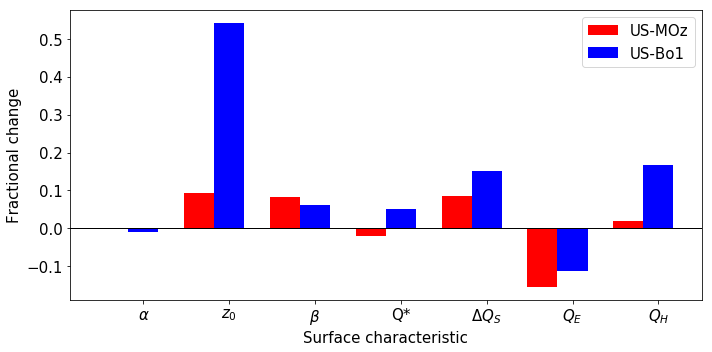

In [179]:
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(len(M))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, M, bar_width, color='r',label='US-MOz')

rects2 = plt.bar(index + bar_width, B, bar_width, color='blue', label='US-Bo1')

plt.xlabel('Surface characteristic', fontsize=15)
plt.ylabel('Fractional change', fontsize=15)
plt.xticks(index + bar_width, (r'$\alpha$', '$z_{0}$', r'$\beta$', 'Q*',r'$\Delta Q_{S}$','$Q_{E}$','$Q_{H}$'))
plt.axhline(y=0,linewidth=1, color='black')
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.tight_layout()
plt.savefig('Extremeu.png',dpi=200)